In [1]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
import numpy as np

In [2]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Load the file
file = 'text8.txt'
with open(file, 'r') as f:
    text = f.read()

print(len(text))

100000000


In [4]:
# Function to clean the text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and digits
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    return text

cleaned_data = clean_text(text)

print(len(cleaned_data))

100000000


In [5]:
# Split into fixed-size chunks
chunk_size = 500
words = cleaned_data.split()
chunks = [' '.join(words[i:i + chunk_size]) for i in range(0, len(words), chunk_size)]

print(len(chunks))

34011


In [6]:
# Vectorize chunks
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(chunks)

# Normalize the data
X_normalized = normalize(X)

print("TF-IDF Matrix Shape:", X_normalized.shape)

TF-IDF Matrix Shape: (34011, 253516)


In [7]:
# K-means clustering
num_clusters = 30
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_normalized)

# Get cluster labels
labels = kmeans.labels_

In [8]:
# Dimensionality reduction
svd = TruncatedSVD(n_components=2, random_state=42)
reduced_data = svd.fit_transform(X_normalized)

print("Reduced Data Shape:", reduced_data.shape)

Reduced Data Shape: (34011, 2)


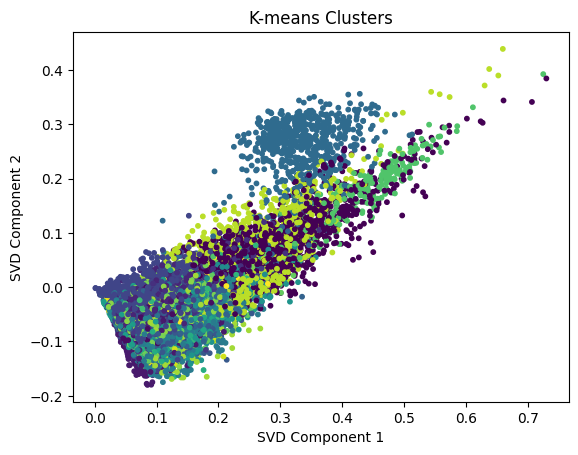

In [10]:
# Plot clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=10)
plt.title("K-means Clusters")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.show()

In [10]:
print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum())  # Cumulative variance

[0.00619575 0.00453354]
0.010729287039041809


In [11]:
# Calculate inertia for a range of K values
# Q: what is inertia in this context?
# A: Inertia is the sum of squared distances of samples to their closest cluster center.
k_values = range(2, 50) # Range of K values
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_normalized)
    inertia.append(kmeans.inertia_)

print(inertia)

KeyboardInterrupt: 

In [ ]:
# Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid()
plt.show()

In [ ]:
# Calculate silhouette scores for a range of K values
# Q: what is silhouette score in this context?
# A: Silhouette score is a measure of how similar an object is to its own cluster compared to other clusters.
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_normalized)
    # Use sample_size to speed up silhouette computation
    score = silhouette_score(X_normalized, kmeans.labels_, metric='euclidean', random_state=42)
    silhouette_scores.append(score)

print (silhouette_scores)

In [ ]:
# Plot the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--')
plt.title("Silhouette Scores for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid()
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\User\AppData\Local\Temp\ipykernel_14692\1470404029.py:51: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=10, cmap='viridis')


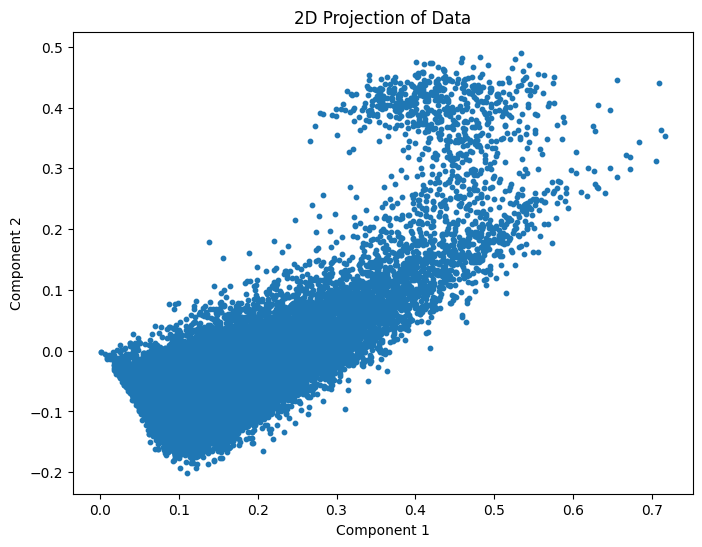

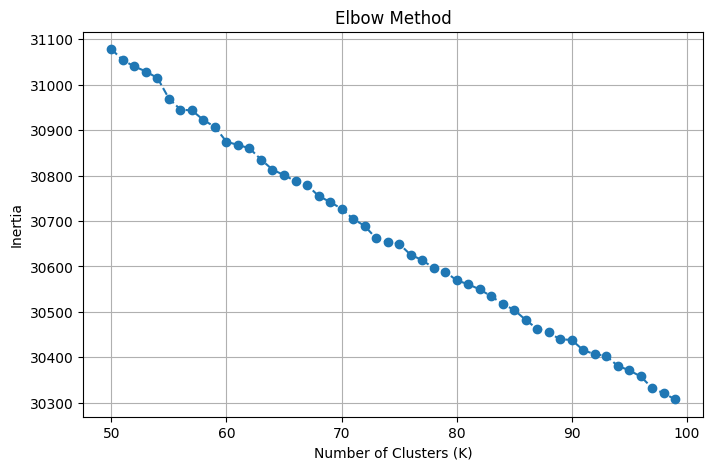

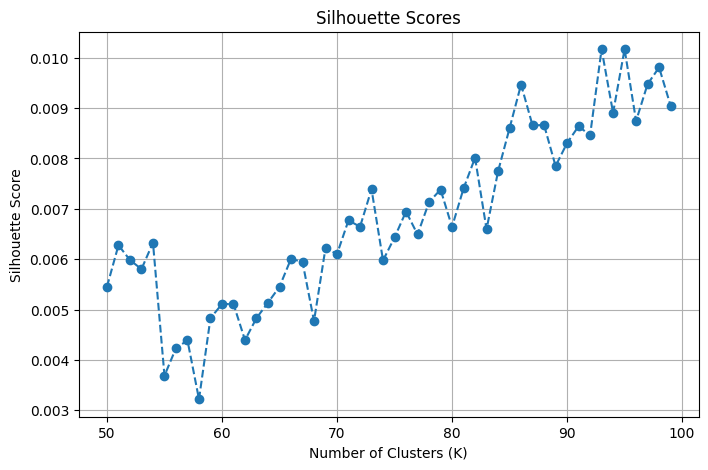

In [12]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Download necessary NLTK resources (only once)
nltk.download('punkt')
nltk.download('stopwords')

# Load and clean text data
def load_text(file):
    with open(file, 'r') as f:
        text = f.read()
    return text

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove digits
    return text

# Load and preprocess the text
file = 'text8.txt'
text = clean_text(load_text(file))

# Tokenize and split into chunks
chunk_size = 500
words = text.split()
chunks = [' '.join(words[i:i + chunk_size]) for i in range(0, len(words), chunk_size)]

# Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X = vectorizer.fit_transform(chunks)

# Normalize
X_normalized = normalize(X)

# Dimensionality reduction
svd = TruncatedSVD(n_components=3, random_state=42)
reduced_data = svd.fit_transform(X_normalized)

# Plot reduced data
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=10, cmap='viridis')
plt.title("2D Projection of Data")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

# K-means clustering with inertia and silhouette analysis
k_values = range(50, 100)
inertia = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_normalized)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(X_normalized, kmeans.labels_, sample_size=10000)
    silhouette_scores.append(score)

# Elbow Plot
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid()
plt.show()

# Silhouette Score Plot
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()
